
<div style="width: 100%; text-align: center">
    <span style="font-size: 22px">Google's PageRank Algorithm - a closer look</span> 
    <br>
    <br>
    <span style="font-size: 15px; color: darkgrey">Gleb Sokolovski, S2015488</span> <br>
    <span style="font-size: 15px; color: grey">Team Name: MathsG</span>
</div>


This paper will focus on Google's PageRank Algortihm. We'll be breaking down what we've been given in the notes and adding some of our input. We start by looking at the definition of a <b>Graph</b>.

## Graph


<b style="font-size: 16px">Definition 1</b> <br>
A graph is a couple $G = (V,E)$, where $V = \{ v_1,v_2,...,v_n \}$ is a finite set of elements (the nodes of the graph) and $E=\{ e_1,e_2,...,e_m \} \subseteq V \times V$ is a subset of couples of nodes (the edges of the graph).

<br>
<br>

In the picture below on the left we have a possible representation of a graph $G$ with $V = \{ v_1, v_2, v_3, v_4 \}$ and $E = \{ (v_1, v_2), (v_1, v_3), (v_1, v_4), (v_2, v_3), (v_3, v_4) \}$. On the right there is a representation of a direct graph $G$ with $V = \{ v_1, v_2, v_3, v_4 \}$ and $E = \{ (v_1, v_2), (v_1, v_3), (v_2, v_1), (v_2, v_3), (v_3, v_4), (v_4, v_1) \}$.

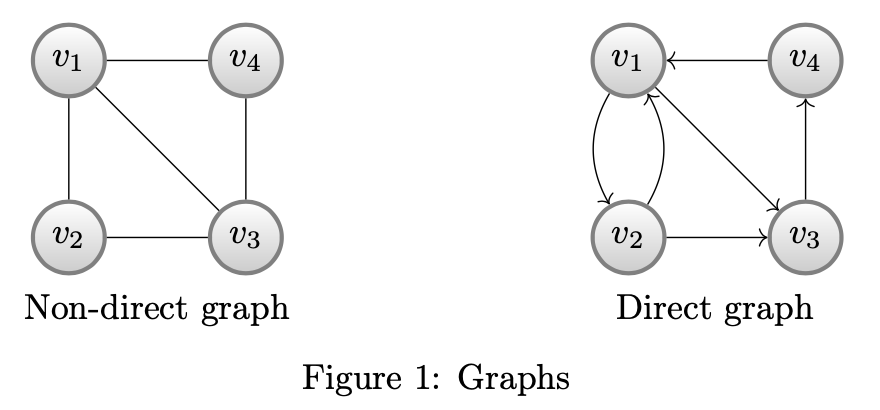

<br>
<br>

<b style="font-size: 16px">Definition 2</b> <br> 
If $G = (V,E)$ is a direct graph, a direct path in G is a sequence of nodes $(v_0, v_1,...,v_n)$ such that $(v_i, v_{i+1}) \in E$ for each $i = 0,1,...,k−1$. We say that k is the length of the path. <br>
If none of the nodes appear in the sequence twice, with the possible exception of $v_0$ and $v_k$, the path is simple. If $v_0$ = $v_k$ the path is closed. A <b>cycle</b> is a path that is both simple and closed.





Let's define a Graph as a tuple of lists like so:

In [2]:
v0, v1, v2, v3 = var("v0 v1 v2 v3")
G = ([v0, v1, v2, v3], [(v0, v1), (v1, v2), (v2, v3), (v3, v0)])
G

([v0, v1, v2, v3], [(v0, v1), (v1, v2), (v2, v3), (v3, v0)])

In [3]:
vertices = G[0]
edges = G[1]

print(vertices)
print(edges)

[v0, v1, v2, v3]
[(v0, v1), (v1, v2), (v2, v3), (v3, v0)]


<div class="alert alert-info">
    <h3>Exercise 1</h3>

<span class="label label-danger">(assessed)</span>
Write a function that retuns whether the given a direct graph given as a list of edges E like in the example above is closed and/or simple.

</div>

In [4]:
def identifyGraph(G):
    '''
    Given a Graph, return a list of properties of the graph as a dictionary: 
        { "closed" : True/False, "simple", True/False }
    '''
    ## YOUR CODE HERE
    raise NotImplementedError()
    

In [9]:
## SOLUTION

def identifyGraph(G):
    '''
    Given a Graph, return a list of properties of the graph as a dictionary: 
        { "closed" : True/False, "simple", True/False }
    '''
    V = G[0]
    E = G[1]
    closed = True
    simple = True
    
    path = [e[0] for e in E]
    if len(path) != len(set(path)): ## set(list) gets rid of all the repititions
        simple = False
        
    if (path[0] != E[len(E)-1][1]): ## checking if first and last are equal
        closed = False
        
    properties = {
        "closed" : closed, 
        "simple": simple,
    }
    
    return properties ## O(n)
    

In [2]:
v1, v2, v3, v4, v5 = var("v1 v2 v3 v4 v5")
G1 = ([v1, v2, v3, v4, v5], [(v1, v2), (v2, v5), (v5, v4), (v4, v3), (v3, v1)])
prop1 = identifyGraph(G1)

G2 = ([v1, v2, v3, v4, v5], [(v1, v2), (v2, v5), (v5, v2), (v2, v3), (v3, v4), (v4, v1)])
prop2 = identifyGraph(G2)

assert prop1["closed"] == True and prop1["simple"] == True
assert prop2["closed"] == True and prop2["simple"] == False

print("You are good with Graphs!")

You are good with Graphs!


## Graph $\rightarrow$ Matrix

Pretty self-explanatory title - we will be writing a function that turns our list of vertices and edges into a matrix. 

<b style="font-size: 16px">Definition 3</b> <br>
We call the adjacency matrix $A$ of $G$ the $n \times n$ square matrix, where $n = |V|$, such that:
<ul style="margin-left: 20px; margin-top: 0px">
    <li>$a_{ij} = 1$ if $(v_i, v_j) \in E$</li>
    <li>$a_{ij} = 0$ if $(v_i, v_j) \not\in E$</li>
</ul>



<div class="alert alert-info">
    <h3>Exercise 2</h3>

<span class="label label-danger">(assessed)</span>
Write a function that retuns the matrix representing the given graph.

</div>

In [ ]:
def graph_to_matrix(G):
    '''
        This function takes in a Graph G as defined above, and returns a matrix equivalent as is described in 
        Definition 3. The return must be of type Matrix.
    '''
    ## YOUR CODE HERE
    raise NotImplementedError()

In [10]:
def graph_to_matrix(G):
    '''
        This function takes in a Graph G as defined above, and returns a matrix equivalent as is described in 
        Definition 3. The return must be of type Matrix.
    '''
    V = G[0]
    E = G[1]
    n = len(V)
    A = Matrix(n, n, [0 for i in range(n^2)]) ## set it to the zero matrix

    for i in range(n):
        for j in range(n):
            if (V[i], V[j]) in E:
                A[i, j] = 1
    
    return A ## O(n^2)


In [4]:
v1, v2, v3, v4, v5 = var("v1 v2 v3 v4 v5")
G1 = ([v1, v2, v3, v4, v5], [(v1, v2), (v2, v5), (v5, v4), (v4, v3), (v3, v1)])
correct_M = Matrix(5, 5, [0,1,0,0,0, 0,0,0,0,1, 1,0,0,0,0, 0,0,1,0,0, 0,0,0,1,0])
assert graph_to_matrix(G1) == correct_M
print("I'm going to get in touch with Google. They should hire you.")

I'm going to get in touch with Google. They should hire you.


A more accurate representation of the Graph $\rightarrow$ Matrix concept is given by the following formula: let P and Q be pages of the web, then we indicate with r(P) and r(Q) the ranks of the pages - in other words importance.
<div style="width: 100%; text-align: center">
    $r(P) = \sum_{Q \rightarrow P} \frac{r(Q)}{|Q|}$
</div>
where $|Q|$ is the number of outgoing links of the page $Q$ and the $Q \rightarrow P$ means that the summation is extended over the pages $Q$ that have a link to the page $P$.
<br>
<br>
SO the fewer external links a page has the better it is for the ranking of $P$.

We can give a matrix form to the equation. Let’s $\{P_1, P_2,..., P_n\}$ be the n pages on the web. We may define a  matrix $A$ as the matrix of the probabilities of a transition from a page to another page, in the following way: <br>
<div>$a_{ij} = $ </div>
<div style="margin-left: 23px">$=$ Prob$(P_j \rightarrow P_i) = $</div>
<ul style="margin-left: 20px; margin-top: 0px">
    <li>$\frac{1}{|P_j|}$ if $P_j \rightarrow P_i$</li>
    <li>0 otherwise</li>
</ul>


<div class="alert alert-info">
    <h3>Exercise 3</h3>

<span class="label label-danger">(assessed)</span>
Improve on the function above to include the new and more accurate formula.

</div>

In [ ]:
def improved_graph_to_matrix(G):
    '''
        This function takes in a Graph G defined earlier and returns a matrix A that contains the probabilities
        of transition from one page to another - as defined above. 
        The return must be of type Matrix.
    '''
    ## YOUR CODE HERE
    raise NotImplementedError()

In [11]:
def improved_graph_to_matrix(G):
    '''
        This function takes in a Graph G defined earlier and returns a matrix A that contains the probabilities
        of transition from one page to another - as defined above. 
        The return must be of type Matrix.
    '''
    V = G[0]
    E = G[1]
    n = len(V)
    A = Matrix(QQ, n, n, [0 for i in range(n^2)])
    
    fractions = [] ## we are going to store the probability for each page here
    for i in range(n):
        total: int = 0 ## counting total number of outgoing links
        for j in range(len(E)):
            if E[j][0] == V[i]:
                total += 1
        fractions.append(1/total)

    for i in range(n):
        for j in range(len(E)):
            if E[j][0] == V[i]:
                pos = V.index(E[j][1])
                A[pos, i] = fractions[i] ## setting a_ij as the probability of landing on the page
    
    return A ## O(n^2)


In [77]:
v1, v2, v3, v4, v5 = var("v1 v2 v3 v4 v5")
G = ([v1, v2, v3, v4, v5], [(v1, v2), (v1, v5), (v2, v5), (v2, v4), (v5, v4), (v4, v3), (v3, v1)])
correct_M = Matrix(QQ, 5, 5, [0,0,1,0,0, 1/2,0,0,0,0, 0,0,0,1,0, 0,1/2,0,0,1, 1/2,1/2,0,0,0])
assert improved_graph_to_matrix(G) == correct_M
print("All good, well done!")

All good, well done!


## Eigenvalues and Eigenvectors



Let's look at real eigenvalues $\lambda \in \mathbb{R}$ and associated real eigenvectors $v \in \mathbb{R}^n$. We will indicate with:
<ul style="margin-top: 0px">
    <li>$E(\lambda)$: eigenspace of the eigenvalue λ, that is the subspace of $\mathbb{R}^n$ spanned by the eigenvectors associated to $\lambda$.</li>
    <li>Sp$(A)$ the spectrum of the matrix $A$, that is the set of the eigenvalues of $A$.</li>
    <li>$\rho(A)$ the spectral radius of $A$, that is $\rho(A) = \max_{1 \le i \le n} |\lambda i|$.</li>
</ul>

<b style="font-size: 15px; font-weight: 600">Interesting Remark</b> <br>
If $\lambda$ is an eigenvalue of $A$, its associated eigenspace $E(\lambda)$ is the set of solutions of the linear homogeneous system $(A − I)v = 0$. The dimension of $E(\lambda)$ as a subspace of $\mathbb{R}^n$ is the so called geometric multiplicity $m_g(\lambda)$ of $\lambda$.


### The Dominant Eigenvalue


<b style="font-size: 16px">Definition 4</b> <br>
We define the eigenvalue of a matrix A the <b style="font-style: italic">dominant</b> eigenvalue as a real (not complex) eigenvalue who's absolute value is greater than the absolute values of all the other eigenvalues.


<b style="font-size: 16px">Theorem (Perron-Frobenius for positive matrices)</b> Let A be an n × n positive matrix. Then the following statements hold: <br>
<ol style="margin-top: 0px">
    <li>There is an eigenvalue r (the so called Perron-Frobenius eigenvalue), that is real and positive, and for any other eigenvalue $\lambda$ we have $|\lambda| < r$. Then $r = \rho(A)$.</li>
    <li>$r$ is a simple eigenvalue, that is a simple root of the characteristic polynomial. In other words its algebraic multiplicity is one ($m_a(r) = 1$). As a consequence the eigenspace $E(r)$ associated with $r$ is one-dimensional.</li>
    <li>There exists a positive eigenvector $v$ associated with $r$. Respectively, there exists a positive left eigenvector $w$.</li>
    <li>There are no other positive eigenvectors of $A$, except (positive) multiples of $v$ (respectively, left eigenvectors except $w$).</li>
    <li>$\lim_{k \to \infty} (\frac{A}{r})^k = vw^T$ where the right and left eigenvectors are normalized, so that $w^T v = 1$. Moreover, the matrix $vw^T$ is the projection onto the eigenspace $E(r)$, the so called Perron projection.</li>
    <li>The Perron-Frobenius eigenvalue r satisfies the inequalities <br>
        <p style="width: 100%; text-align: center">$\min_{i} \sum_{j} a_{ij} \le r \le \max_{i} \sum_{j} a_{ij}$</p>
    </li>
    
</ol>


<br>
<br>

Let's try to show that the theorem above holds with an example. Consider the following positive matrix A:

In [7]:
A = Matrix(3, 3, [1, 2, 3, 4, 5, 6, 7, 8, 9])
pretty_print(A)

[1 2 3]
[4 5 6]
[7 8 9]

Let's now calculate the eigenvalues, eigenvectors, and hence the eigenspace of A.

In [12]:
calculations_right = A.eigenvectors_right() ## we've done this in labs
spec = [c[0] for c in calculations_right] ## getting the eigenvalues
print("spec(A) = ")
pretty_print([round(c, 6) for c in spec]) ## rounding them so they look nicer - don't round them at the core var or the calculations will be off

eigenvectors = [c[1][0] for c in calculations_right] ## right eigenvectors
m_eigenvectors = []
for i in range(3):
    m_eigenvectors.append(round(eigenvectors[0][i], 6)) ## once again rounding - not at the core!
    m_eigenvectors.append(round(eigenvectors[1][i], 6)) ## ~
    m_eigenvectors.append(round(eigenvectors[2][i], 6)) ## ~
M = Matrix(3, 3, m_eigenvectors)
print("E(lambda) = ")
pretty_print(M)

spec(A) = 


[0.0, -1.116844, 16.116844]

E(lambda) = 


[      1.0       1.0       1.0]
[     -2.0  0.110395  2.264605]
[      1.0 -0.779211  3.529211]

So we can see that $ \lambda = 16.116844 $ is the dominant eigenvalue. And the associated eigenvector is positive meaning points 1, 2, and 3 from the Perron-Frobenius theorem hold.

We can also see that the other 2 eigenvectors are not all positive, which shows that point number 4 also holds.

We will need to do some further calculations to verify that point number 5 holds. Let's try to calculate the matrix $vw^T$ ($v$ = right eigenvector associated with dominant eigenvalue, $w$ = left eigenvector associated with dominant eigenvalue).

In [13]:
## Let's start by finding the left eigenvectors:
r = max([abs(i) for i in spec]) ## getting the dominant eigenvalue
calculations_left = A.eigenvectors_left() 
for i in calculations_left:
    if i[0] == r: ## getting the left eigenvector associated with the dominant eigenvalue
        max_eigenvector_left = i[1][0]
        break

for i in calculations_right:
    if i[0] == r: ## getting the right eigenvector associated with the dominant eigenvalue
        max_eigenvector_right = i[1][0]
        break

wT = Matrix(1, 3, [i for i in max_eigenvector_left])
pretty_print("w^T = ")
pretty_print(wT)

v = Matrix(3, 1, [i for i in max_eigenvector_right])
pretty_print("v = ")
pretty_print(v)

vwT = v*wT
pretty_print("v*w^T = ")
pretty_print(vwT)





'w^T = '

[                 1 1.228713553878170? 1.457427107756339?]

'v = '

[                 1]
[2.264605496225881?]
[3.529210992451761?]

'v*w^T = '

[                 1 1.228713553878170? 1.457427107756339?]
[2.264605496225881? 2.782551467399737? 3.300497438573592?]
[3.529210992451761? 4.336389380921303? 5.143567769390846?]

Let's now calculate the dreaded $\lim_{k \to \infty} (\frac{A}{r})^k$:

In [14]:
k = SR.var("k") ## defining new var
l = ((A/r)^k).apply_map(lambda x: lim(x, k=oo))
pretty_print(l)


[-7/132*sqrt(33) + 5/12  -1/198*sqrt(33) + 1/6 17/396*sqrt(33) - 1/12]
[   1/66*sqrt(33) + 1/6   5/198*sqrt(33) + 1/6   7/198*sqrt(33) + 1/6]
[  1/12*sqrt(33) - 1/12    1/18*sqrt(33) + 1/6   1/36*sqrt(33) + 5/12]

The two matrices currently look very different to each other, but let's compare them by the magic of python's == operator:

In [15]:
print(l == vwT)

False


False? How can that be?

Let's remember what the theorem said:
<div style="width: 90%; margin: auto; border: 2px solid black; text-align: center; padding: 10px; border-radius: 10px; ">
    $\lim_{k \to \infty} (\frac{A}{r})^k = vw^T$ <b>where the right and left eigenvectors are normalized, so that $w^T v = 1$</b>. Moreover, the matrix $vw^T$ is the projection onto the eigenspace $E(r)$, the so called Perron projection.
</div>

That's right, we forgot to normalize them. For that, we are going to do the following trick: let's redefine $v$ as
<div style="width: 100%; text-align: center">
    $v = \frac{v}{v \cdot w^T}$
</div>

In [16]:
max_eigenvector_right = max_eigenvector_right / (max_eigenvector_right * max_eigenvector_left)
v = Matrix(3, 1, [i for i in max_eigenvector_right])
pretty_print("v = ")
pretty_print(v)

pretty_print("w^T * v == 1 is ")
pretty_print(wT * v == 1)

vwT = v*wT
pretty_print("v*w^T = ")
pretty_print(vwT)

'v = '

[0.11203076874419545?]
[ 0.2537054946445156?]
[ 0.3953802205448357?]

'w^T * v == 1 is '

True

'v*w^T = '

[0.11203076874419545?  0.1376537240073837?  0.1632766792705720?]
[ 0.2537054946445156?  0.3117313799630815?  0.3697572652816475?]
[ 0.3953802205448357?  0.4858090359187794?  0.5762378512927230?]

We try our calculation of comparison again:

In [17]:
print(l == vwT)

True


Whoooray!

To conclude the example, it’s immediate to verify point 6 of the theorem, as
<div style="width: 100%; text-align: center">
    $\min_{i} \sum_{j} a_{ij} = 6$  and  $\max_{i} \sum_{j} a_{ij} = 24$
</div>
and we have that the dominant eigenvalue $r = \frac{3\sqrt{33} + 15}{2}$, which satisfies
<div style="width: 100%; text-align: center">
    $6 \le \frac{3\sqrt{33} + 15}{2} \le 24$.
</div>

So our example shows that everything in the Perron-Frobenius Theorem holds.

<div class="alert alert-info">
    <h3>Exercise 3</h3>

<span class="label label-danger">(assessed)</span> <br>
Write two functions:
    <ul>
        <li>left_right_eigenvectors: takes in a matrix A and returns the dominant eigenvalue and the matrix created from $v \cdot w^T$ (be careful of normalization)</li>
        <li>lim_A_r: takes in a matrix A and the dominant eigenvalue and returns the matrix: $\lim_{k \to \infty} (\frac{A}{r})^k$</li>
    </ul>

</div>

In [ ]:
def left_right_eigenvectors(A: Matrix):
    '''
        Given a Matrix A, the function returns a tuple consisting of the dominant eigenvalue and the Matrix vw^T, 
        where v is the right eigenvector associated with the dominant eigenvalue, and w is the left eigenvector 
        associated with the dominant eigenvalue, and they satisfy that w^T*v = 1.
        The return must be of type (r: float, M: Matrix).
    '''
    ## YOUR CODE HERE
    raise NotImplementedError()


def lim_A_r(A: Matrix, r: float):
    '''
        Takes in the matrix A and the dominant eigenvalue r and returns the matrix (A/r)^k as k -> oo.
        The return type must be of type Matrix.
    '''
    ## YOUR CODE HERE
    raise NotImplementedError()

In [20]:
def left_right_eigenvectors(A: Matrix):
    '''
        Given a Matrix A, the function returns a tuple consisting of the dominant eigenvalue and the Matrix vw^T, 
        where v is the right eigenvector associated with the dominant eigenvalue, and w is the left eigenvector 
        associated with the dominant eigenvalue, and they satisfy that w^T*v = 1.
        The return must be of type (r: float, M: Matrix).
    '''
    eigen_right = A.eigenvectors_right()
    eigen_left = A.eigenvectors_left()
    
    max_eigenvalue: float = eigen_right[0][0] ## assinging dominant eigenvalue to the first one, then iterating to correct that
    
    max_eigenvector_right: Vector_rational_dense = eigen_right[0][1] ## assinging the first one
    max_eigenvector_left: Vector_rational_dense = eigen_left[0][1]   ## ~
    
    eigenvector_dict_right = { max_eigenvalue : max_eigenvector_right, }
    eigenvector_dict_left = { max_eigenvalue : max_eigenvector_left, }
    
    for i in range(1, A.nrows()): ## starting from 1 because we don't want to go over 0 again as we have already defined it above
        if abs(eigen_right[i][0]) > abs(max_eigenvalue): ## checking if the new eigenvalue is bigger
            max_eigenvalue = eigen_right[i][0]
        
        eigenvector_dict_right[eigen_right[i][0]] = eigen_right[i][1] ## adding to the dictionary
        eigenvector_dict_left[eigen_left[i][0]] = eigen_left[i][1]    ## adding to the dictionary
    
    
    max_eigenvector_right = eigenvector_dict_right[max_eigenvalue][0] ## the actual right eigenvector associated with dominant eigenvalue
    eigenvector_right_matrix = Matrix(A.nrows(), 1, [i for i in max_eigenvector_right])

    max_eigenvector_left = eigenvector_dict_left[max_eigenvalue][0]   ## the actual left  eigenvector associated with dominant eigenvalue
    eigenvector_left_matrix = Matrix(1, A.nrows(), [i for i in max_eigenvector_left])

    if max_eigenvector_left * max_eigenvector_right != 1: ## checking if they are normalized
        max_eigenvector_right = max_eigenvector_right / (max_eigenvector_right * max_eigenvector_left)


    eigenvector_right_matrix = Matrix(A.nrows(), 1, [i for i in max_eigenvector_right])
    eigenvector_left_matrix = Matrix(1, A.nrows(), [i for i in max_eigenvector_left])
    return (max_eigenvalue, eigenvector_right_matrix * eigenvector_left_matrix)


def lim_A_r(A: Matrix, r: float):
    '''
        Takes in the matrix A and the dominant eigenvalue r and returns the matrix (A/r)^k as k -> oo.
        The return type must be of type Matrix.
    '''
    k = SR.var("k")
    M = ((A/r)^k).apply_map(lambda x: lim(x, k=oo))
    return M



In [19]:
M = Matrix(3, 3, [7, 2, 4, 8, 9, 6, 1, 7, 2])
res = left_right_eigenvectors(M)
eigen = res[0]
vwT = res[1]
assert lim_A_r(M, eigen) == vwT
print("You are on fire")

You are on fire


## PageRank Algorithm

We are now going to see the reason why the dominant eigenvalue and its corresponding eigenvector are important in the PageRank algorithm.
<br>
<br>
Suppose we collect all the web page ranks in a vector r. We want to compute it in an iterative way, starting from the previous evaluation of r. At the beginning, let us assume that all the pages have the same rank. Using probability discussed in the <b>Graph $\rightarrow$ Matrix</b> section, we call the first iteration of r - the <b>uniform distribution vector</b>, and denote it $r^{(0)}$:
<div style="width:100%;text-align:center;">
    $r^{(0)} = (\frac{1}{n}, \frac{1}{n},..., \frac{1}{n})^T$
</div>
Let's now rewrite the following equation we introduced in the same section:
<div style="width: 100%; text-align: center">
    $r(P) = \sum_{Q \rightarrow P} \frac{r(Q)}{|Q|}$
</div>
in terms of n pages $P_1, P_2,...,P_n$ of the web, and in particular for the i-th page $P_i$, after the first transition:
<div style="width: 100%; text-align: center">
    $r_{i}^{(1)}(P) = \sum_{P_j \rightarrow P_i} \frac{r_j^{(0)}}{|P_j|} = \sum_{P_j \rightarrow P_i} \frac{1}{|P_j|} \cdot r_j^{(0)} = \sum_{j = 1}^{n} a_ij \cdot r_j^{(0)} ~~~~~   i=1,2,...,n$
</div>
BUT in matrix form, we write that as:
<div style="width: 100%; text-align: center">
    $r^{(1)} = Ar^{(0)}$ <br>
</div>
and
<div style="width: 100%; text-align: center">
    $r^{(k+1)} = Ar^{(k)} ~~~~~ k=0,1,...$
</div>
becomes the iterative sequence we use. 

<br>
<br>
From here we rely on a theorem [1]  that states that the limit of the iterative sequence concluded above is an eigenvector associated to the dominant eigenvalue and <b>the ranks of the web pages are the components of this normalized limit vector</b>!

<div style="margin-top: 50px;font-style: italic; font-size: 16px">And that's how the ranks of the pages are calculated using linear algebra (and a bit of graph theory and probability).</div>




## References

<ol>
    <li>Power iteration, at <a href="https://en.wikipedia.org/wiki/Power_iteration"> https://en.wikipedia.org/wiki/Power_iteration </a> and related pages</li>
    <br>
    <li>PageRank, at <a href="https://it.wikipedia.org/wiki/PageRank"> https://it.wikipedia.org/wiki/PageRank </a> and related pages</li>
    <br>
    <li>G. H. Golub, C.F. Van Loan, <a href="https://twiki.cern.ch/twiki/pub/Main/AVFedotovHowToRootTDecompQRH/Golub_VanLoan.Matr_comp_3ed.pdf"> Matrix Computations</a>, The Johns Hopkins University Press, 1996</li>
    <br>
    <li>H. Braden, I. Gordon, R. Gratwick, M. Hering, J. Martens, G. Nemes, A. Ranicki, Honours Algebra 2022-23, University of Edinburgh, 2022</li>
    
</ol>
